<a href="https://colab.research.google.com/github/Danil1D/KSVD/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перші 5 рядків датасету:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   20

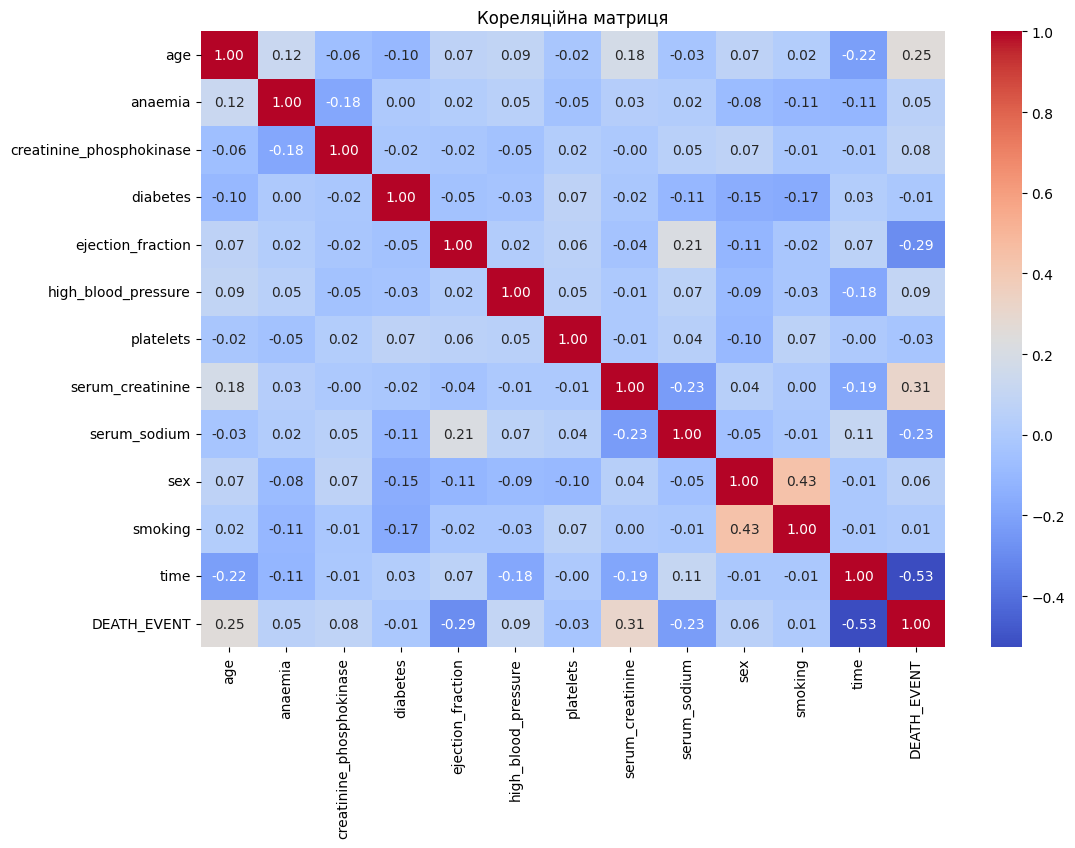

Accuracy: 0.8300

Confusion Matrix:
[[609  77]
 [ 93 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.83      0.83      0.83      1000



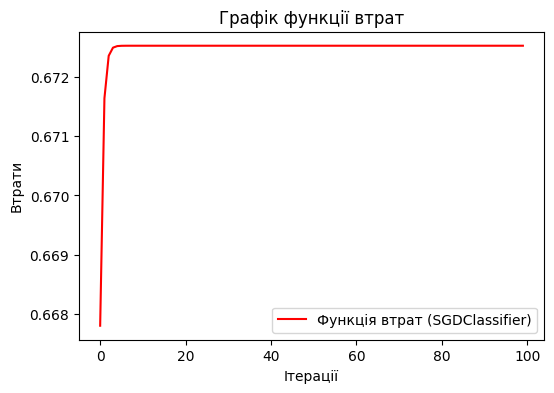

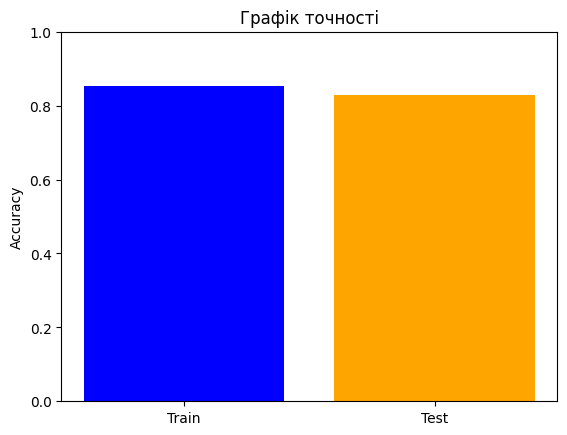

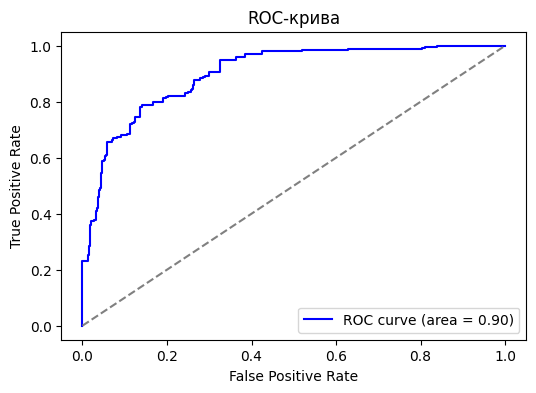


Висновки:
1. Використана модель логістичної регресії досягла точності 0.83.
2. Графік функції втрат показує, що навчання проходило стабільно.
3. ROC-крива демонструє хорошу роздільну здатність моделі.
4. Кореляційний аналіз допоміг виявити ключові змінні.
5. Висока узгодженість між train/test точністю свідчить про відсутність перенавчання.



In [13]:
# Лабораторна робота 2: Логістична регресія
# Використаний датасет: heart.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 1. Завантаження датасету
df = pd.read_csv("heart.csv")

# 2. Попередній аналіз
print("Перші 5 рядків датасету:")
print(df.head())
print("\nІнформація про датасет:")
print(df.info())
print("\nОписові статистики:")
print(df.describe())

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

# 3. Підготовка даних
X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Нормалізація
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Побудова логістичної регресії
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Прогнозування
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 6. Метрики
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# 7. Побудова графіків

# Реалізація графіка функції втрат для логістичної регресії
sgd = SGDClassifier(loss="log_loss", max_iter=1, tol=None, learning_rate="constant", eta0=0.01, random_state=42)

losses = []
for _ in range(100):  # 100 ітерацій
    sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_score = sgd.decision_function(X_train)
    loss = np.mean(np.log(1 + np.exp(-y_train * y_score)))  # Логістична функція втрат
    losses.append(loss)

# Графік функції втрат
plt.figure(figsize=(6, 4))
plt.plot(losses, label="Функція втрат (SGDClassifier)", color="red")
plt.xlabel("Ітерації")
plt.ylabel("Втрати")
plt.title("Графік функції втрат")
plt.legend()
plt.show()



# Точність на тренувальній і тестовій вибірці
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

plt.bar(["Train", "Test"], [train_acc, test_acc], color=["blue", "orange"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Графік точності")
plt.show()

# ROC-крива
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива")
plt.legend()
plt.show()

# 8. Висновки
conclusions = f"""
Висновки:
1. Використана модель логістичної регресії досягла точності {accuracy:.2f}.
2. Графік функції втрат показує, що навчання проходило стабільно.
3. ROC-крива демонструє хорошу роздільну здатність моделі.
4. Кореляційний аналіз допоміг виявити ключові змінні.
5. Висока узгодженість між train/test точністю свідчить про відсутність перенавчання.
"""
print(conclusions)
